In [184]:
import numpy as np
import pandas as pd
from scipy import integrate

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 11
plt.rcParams['savefig.bbox'] = 'tight'

# produce vector inline graphics
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

import warnings
warnings.filterwarnings('ignore')

## Define yield functions

In [176]:
def yield_fun_Hill_2D(sx, sy, sxy, rx, ry, rz, rxy, m, sr):   
    
    F = 0.5 * (1/(ry**m) + 1/(rz**m) - 1/(rx**m))
    G = 0.5 * (1/(rz**m) + 1/(rx**m) - 1/(ry**m))
    H = 0.5 * (1/(rx**m) + 1/(ry**m) - 1/(rz**m))
    N = 3/(2*rxy**m)
    
    eqvStr = F*(abs(sy))**m + G*(abs(sx))**m + H*(abs(sx-sy))**m + 2*N*abs(sxy)**m
    isYield = eqvStr - sr**m
    
    return isYield

In [177]:
from math import sqrt
def yield_fun_MA_2D(sx, sy, sxy, rx, ry, rz, rxy, m, sr):    

    isYield = 0.5 * ((sx/rx-sy/ry)**(2*m) + (sy/ry)**(2*m) + (sx/rx)**(2*m)) + ((sqrt(3)*sxy/rxy)**(2*m)) - sr**(2*m)

    return isYield

In [178]:
# Generate yield contour   
def draw_yield_contour(yield_fun, rx, ry, rz, rxy, m=1.0, sr=1.0, n=1000, ifig=plt, c='r', label=''):
    xs = np.linspace(-sr*2,sr*2,n)
    ys = xs.copy()
    xm,ym = np.meshgrid(xs, ys)
    mps = yield_fun(xm, ym, 0., rx, ry, rz, rxy, m, sr)   
    
    cs = ifig.contour(xm, ym, mps, [0], colors=c)
    cs.collections[0].set_label(label)

    cspts = cs.allsegs[0][0]
    return cspts

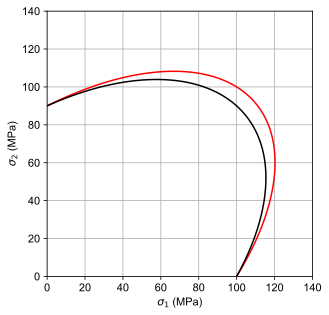

In [179]:
fig = plt.subplot(aspect=1.0)

rx  = 1.0
ry  = 0.9
rxy = 1.0
rz  = 1.0

draw_yield_contour(yield_fun_Hill_2D, rx, ry, 1.0, rxy, m=2, sr=100., ifig=fig, c='r', label='Hill48')
draw_yield_contour(yield_fun_MA_2D,   rx, ry, rz, rxy, m=2, sr=100., ifig=fig, c='k', label='M&A')

plt.xlim(0, 140)
plt.ylim(0, 140)

plt.xlabel(r'$\sigma_1$ (MPa)')
plt.ylabel(r'$\sigma_2$ (MPa)')
# plt.legend()
plt.grid()

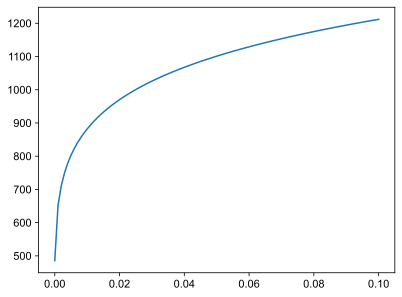

In [282]:
def swift(x, K, ep0, n):
    return K * (ep0 + x)**n

K   = 1668
ep0 = 1.374e-04
n   = 0.1388

swift_x = np.linspace(1e-7, 0.1, 100)
swift_y = swift(swift_x, K, ep0, n)
plt.plot(swift_x, swift_y)

## Read biaxial tensile test data

In [150]:
# read biaxial tensile test data
ype = pd.read_csv('New yld pts from JFE SScurve (raw)/biaxial yield points dataset for TP9.csv', index_col=0)
# ype = pd.read_csv('biaxial yield points (raw).csv', index_col=0)
ype

,sigma 0.2x1,sigma 0.2y1,sigma 0.2x2,sigma 0.2y2,sigma 0.5x1,sigma 0.5y1,sigma 0.5x2,sigma 0.5y2,sigma 1.0x1,sigma 1.0y1,sigma 1.0x2,sigma 1.0y2
,,,,,,,,,,,,
1:0,697.470,0.000,697.470,0.000,798.800,0.000,798.800,0.000,883.393,0.000,883.393,0.000
2:1,867.642,435.139,850.024,426.867,973.608,487.469,964.353,483.591,1063.961,533.455,1058.049,530.885
1:1,718.423,716.141,708.442,706.027,816.442,815.229,807.355,805.942,902.155,901.702,891.670,890.045
1:2,428.883,856.621,414.905,832.579,490.682,979.181,482.235,964.863,541.557,1079.396,534.562,1068.881
0:1,0.000,697.470,0.000,697.470,0.000,798.800,0.000,798.800,0.000,883.393,0.000,883.393


## Manual yield curve fitting

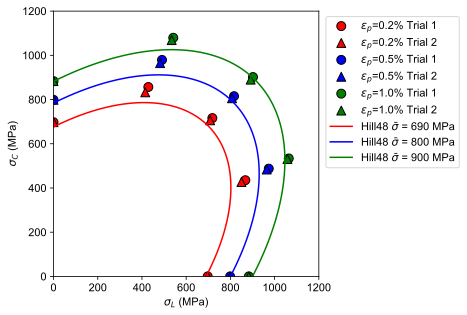

In [278]:
fig = plt.subplot(aspect=1.0)

rx  = 1.0
ry  = 0.98
rxy = 1.0
rz  = 1.0

draw_yield_contour(yield_fun_Hill_2D,   rx, ry, rz, rxy, m=2, sr=690, ifig=fig, c='r')
draw_yield_contour(yield_fun_Hill_2D,   rx, ry, rz, rxy, m=2, sr=800, ifig=fig, c='b')
draw_yield_contour(yield_fun_Hill_2D,   rx, ry, rz, rxy, m=2, sr=900, ifig=fig, c='g')

plt.scatter(ype['sigma 0.2x1'], ype['sigma 0.2y1'], s=80, c='r', marker='o', ec='black', label=r'$\epsilon_p$=0.2% Trial 1')
plt.scatter(ype['sigma 0.2x2'], ype['sigma 0.2y2'], s=80, c='r', marker='^', ec='black', label=r'$\epsilon_p$=0.2% Trial 2')

plt.scatter(ype['sigma 0.5x1'], ype['sigma 0.5y1'], s=80, c='b', marker='o', ec='black', label=r'$\epsilon_p$=0.5% Trial 1')
plt.scatter(ype['sigma 0.5x2'], ype['sigma 0.5y2'], s=80, c='b', marker='^', ec='black', label=r'$\epsilon_p$=0.5% Trial 2')

plt.scatter(ype['sigma 1.0x1'], ype['sigma 1.0y1'], s=80, c='g', marker='o', ec='black', label=r'$\epsilon_p$=1.0% Trial 1')
plt.scatter(ype['sigma 1.0x2'], ype['sigma 1.0y2'], s=80, c='g', marker='^', ec='black', label=r'$\epsilon_p$=1.0% Trial 2')

plt.xlim(0, 1200)
plt.ylim(0, 1200)

# dummy plots
plt.plot([0], [0], 'r-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %690)
plt.plot([0], [0], 'b-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %800)
plt.plot([0], [0], 'g-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %900)

plt.xlabel(r'$\sigma_L$ (MPa)')
plt.ylabel(r'$\sigma_C$ (MPa)')
plt.legend(bbox_to_anchor=(1.55, 1))

plt.savefig('Hill48_fit_raw.svg')

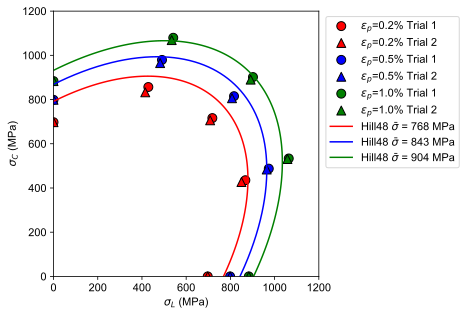

In [279]:
fig = plt.subplot(aspect=1.0)

rx  = 1.0
ry  = 1.03
rxy = 1.0
rz  = 1.0

draw_yield_contour(yield_fun_Hill_2D,   rx, ry, rz, rxy, m=2, sr=swift(0.002, K, ep0, n), ifig=fig, c='r')
draw_yield_contour(yield_fun_Hill_2D,   rx, ry, rz, rxy, m=2, sr=swift(0.005, K, ep0, n), ifig=fig, c='b')
draw_yield_contour(yield_fun_Hill_2D,   rx, ry, rz, rxy, m=2, sr=swift(0.010, K, ep0, n), ifig=fig, c='g')

plt.scatter(ype['sigma 0.2x1'], ype['sigma 0.2y1'], s=80, c='r', marker='o', ec='black', label=r'$\epsilon_p$=0.2% Trial 1')
plt.scatter(ype['sigma 0.2x2'], ype['sigma 0.2y2'], s=80, c='r', marker='^', ec='black', label=r'$\epsilon_p$=0.2% Trial 2')

plt.scatter(ype['sigma 0.5x1'], ype['sigma 0.5y1'], s=80, c='b', marker='o', ec='black', label=r'$\epsilon_p$=0.5% Trial 1')
plt.scatter(ype['sigma 0.5x2'], ype['sigma 0.5y2'], s=80, c='b', marker='^', ec='black', label=r'$\epsilon_p$=0.5% Trial 2')

plt.scatter(ype['sigma 1.0x1'], ype['sigma 1.0y1'], s=80, c='g', marker='o', ec='black', label=r'$\epsilon_p$=1.0% Trial 1')
plt.scatter(ype['sigma 1.0x2'], ype['sigma 1.0y2'], s=80, c='g', marker='^', ec='black', label=r'$\epsilon_p$=1.0% Trial 2')

plt.xlim(0, 1200)
plt.ylim(0, 1200)

# dummy plots
plt.plot([0], [0], 'r-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %swift(0.002, K, ep0, n))
plt.plot([0], [0], 'b-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %swift(0.005, K, ep0, n))
plt.plot([0], [0], 'g-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %swift(0.010, K, ep0, n))

plt.xlabel(r'$\sigma_L$ (MPa)')
plt.ylabel(r'$\sigma_C$ (MPa)')
plt.legend(bbox_to_anchor=(1.55, 1))

plt.savefig('Hill48_Swift_fit_raw.svg')

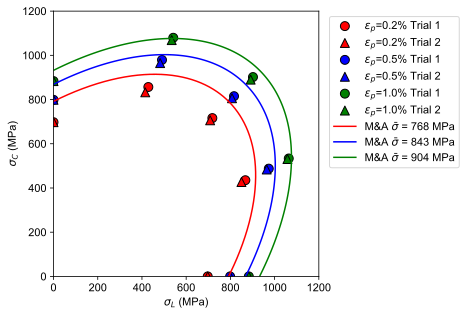

In [280]:
fig = plt.subplot(aspect=1.0)

rx  = 1.03
ry  = 1.03
rxy = 1.0
rz  = 1.0

draw_yield_contour(yield_fun_MA_2D, rx, ry, rz, rxy, m=2, sr=swift(0.002, K, ep0, n), ifig=fig, c='r')
draw_yield_contour(yield_fun_MA_2D, rx, ry, rz, rxy, m=2, sr=swift(0.005, K, ep0, n), ifig=fig, c='b')
draw_yield_contour(yield_fun_MA_2D, rx, ry, rz, rxy, m=2, sr=swift(0.010, K, ep0, n), ifig=fig, c='g')

plt.scatter(ype['sigma 0.2x1'], ype['sigma 0.2y1'], s=80, c='r', marker='o', ec='black', label=r'$\epsilon_p$=0.2% Trial 1')
plt.scatter(ype['sigma 0.2x2'], ype['sigma 0.2y2'], s=80, c='r', marker='^', ec='black', label=r'$\epsilon_p$=0.2% Trial 2')

plt.scatter(ype['sigma 0.5x1'], ype['sigma 0.5y1'], s=80, c='b', marker='o', ec='black', label=r'$\epsilon_p$=0.5% Trial 1')
plt.scatter(ype['sigma 0.5x2'], ype['sigma 0.5y2'], s=80, c='b', marker='^', ec='black', label=r'$\epsilon_p$=0.5% Trial 2')

plt.scatter(ype['sigma 1.0x1'], ype['sigma 1.0y1'], s=80, c='g', marker='o', ec='black', label=r'$\epsilon_p$=1.0% Trial 1')
plt.scatter(ype['sigma 1.0x2'], ype['sigma 1.0y2'], s=80, c='g', marker='^', ec='black', label=r'$\epsilon_p$=1.0% Trial 2')

plt.xlim(0, 1200)
plt.ylim(0, 1200)

# dummy plots
plt.plot([0], [0], 'r-', label=r'M&A $ \bar \sigma $ ='+' %d MPa' %swift(0.002, K, ep0, n))
plt.plot([0], [0], 'b-', label=r'M&A $ \bar \sigma $ ='+' %d MPa' %swift(0.005, K, ep0, n))
plt.plot([0], [0], 'g-', label=r'M&A $ \bar \sigma $ ='+' %d MPa' %swift(0.010, K, ep0, n))

plt.xlabel(r'$\sigma_L$ (MPa)')
plt.ylabel(r'$\sigma_C$ (MPa)')
plt.legend(bbox_to_anchor=(1.55, 1))

plt.savefig('MA_Swift_fit_raw.svg')

## Least-squares fitting

Test the minimum distance finding function

(0.0, 140.0)

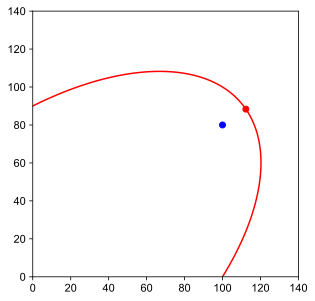

In [24]:
fig = plt.subplot(aspect=1.0)

ycpts = draw_yield_contour(yield_fun_Hill_2D, rx, ry, 1.0, rxy, m=2, sr=100., ifig=fig, c='r', label='Hill48')

fpt = [100, 80]

# find minimum distance between fpt and data0
dist = np.sqrt((ycpts[:,0]-fpt[0])**2 + (ycpts[:,1]-fpt[1])**2)
imin = np.argmin(dist)

plt.scatter(fpt[0], fpt[1], c='b')
plt.scatter(ycpts[imin,0], ycpts[imin,1],c='r')

plt.xlim(0, 140)
plt.ylim(0, 140)

Least-squares objective function

In [242]:
def ls_objective_Hill(x, ypts, ep):
    '''
    cspts = contour points [xs, ys]
    ypts  = yield points   [xs, ys]
    return the sum of0 square errors between the contour and the yield points
    '''
    ry = x[0]; rz = x[1]; rxy = x[2]

    cspts = draw_yield_contour(yield_fun_Hill_2D, 1.0, ry, rz, rxy, m=2, sr=swift(ep, K, ep0, n), ifig=fig, c='r', label='Hill48')

    total_dist = 0.0

    for p in ypts:        
        dist = np.sqrt((cspts[:,0]-p[0])**2 + (cspts[:,1]-p[1])**2)
        imin = np.argmin(dist)
        total_dist += dist[imin]**2
        
    return total_dist

In [243]:
def ls_objective_MA(x, ypts, ep):
    '''
    cspts = contour points [xs, ys]
    ypts  = yield points   [xs, ys]
    return the sum of0 square errors between the contour and the yield points
    '''
    ry = x[0]; rz = x[1]; rxy = x[2]

    cspts = draw_yield_contour(yield_fun_MA_2D, 1.0, ry, rz, rxy, m=2, sr=swift(ep, K, ep0, n), ifig=fig, c='r', label='M&A')

    total_dist = 0.0

    for p in ypts:        
        dist = np.sqrt((cspts[:,0]-p[0])**2 + (cspts[:,1]-p[1])**2)
        imin = np.argmin(dist)
        total_dist += dist[imin]**2
        
    return total_dist

Fit the YF parameters using least-squares

In [244]:
from scipy.optimize import minimize

# assemble experimental yield points into 2D array
ypts = np.array([ype['sigma 0.2x1'], ype['sigma 0.2y1']])
ypts = np.append(ypts, np.array([ype['sigma 0.2x2'], ype['sigma 0.2y2']]), axis=1)
ypts = ypts.transpose()

# initial values
x0 = [1.0, 1.0, 1.0]

res = minimize(ls_objective_Hill, x0, args=(ypts, 0.002))

ry=0.9887, rz=1.0240, rxy=1.0000


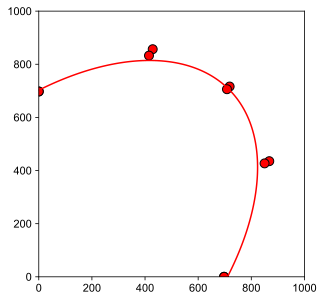

In [245]:
rx = 1.0; ry = res.x[0]; rz = res.x[1]; rxy = res.x[2]

fig = plt.subplot(aspect=1.0)
draw_yield_contour(yield_fun_Hill_2D, rx, ry, 1.0, rxy, m=2, sr=swift(0.002, K, ep0, n), ifig=fig, c='r')

plt.scatter(ypts[:,0], ypts[:,1], s=80, c='r', marker='o', ec='black', label=r'$\epsilon_p$=0.2%')

plt.xlim(0, 1000)
plt.ylim(0, 1000)

print('ry=%5.4f, rz=%5.4f, rxy=%5.4f' %(ry, rz, rxy))

ry=1.0106, rz=1.0000, rxy=1.0000


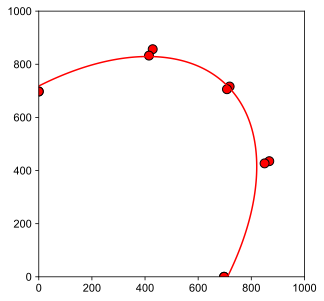

In [247]:
res = minimize(ls_objective_MA, x0, args=(ypts, 0.002))

rx = 1.0; ry = res.x[0]; rz = res.x[1]; rxy = res.x[2]

fig = plt.subplot(aspect=1.0)
draw_yield_contour(yield_fun_MA_2D, rx, ry, 1.0, rxy, m=2, sr=swift(0.002, K, ep0, n), ifig=fig, c='r')

plt.scatter(ypts[:,0], ypts[:,1], s=80, c='r', marker='o', ec='black', label=r'$\epsilon_p$=0.2%')

plt.xlim(0, 1000)
plt.ylim(0, 1000)

print('ry=%5.4f, rz=%5.4f, rxy=%5.4f' %(ry, rz, rxy))

## Fit multiple plastic strain levels at once

In [253]:
ypts1 = np.array([ype['sigma 0.2x1'], ype['sigma 0.2y1']])
ypts1 = np.append(ypts1, np.array([ype['sigma 0.2x2'], ype['sigma 0.2y2']]), axis=1)
ypts1 = ypts1.transpose()

ypts2 = np.array([ype['sigma 0.5x1'], ype['sigma 0.5y1']])
ypts2 = np.append(ypts2, np.array([ype['sigma 0.5x2'], ype['sigma 0.5y2']]), axis=1)
ypts2 = ypts2.transpose()

ypts3 = np.array([ype['sigma 1.0x1'], ype['sigma 1.0y1']])
ypts3 = np.append(ypts3, np.array([ype['sigma 1.0x2'], ype['sigma 1.0y2']]), axis=1)
ypts3 = ypts3.transpose()


def ls_objective_Hill_multiEps(x):
    val = 0.
    val += ls_objective_Hill(x, ypts1, 0.002)
    val += ls_objective_Hill(x, ypts2, 0.005)
    val += ls_objective_Hill(x, ypts3, 0.010)

    return val


def ls_objective_MA_multiEps(x):
    val = 0.
    val += ls_objective_MA(x, ypts1, 0.002)
    val += ls_objective_MA(x, ypts2, 0.005)
    val += ls_objective_MA(x, ypts3, 0.010)

    return val

### Hill48

In [256]:
x0 = [1.0, 1.0, 1.0]

res_Hill = minimize(ls_objective_Hill_multiEps, x0)

rx = 1.0; ry = res.x[0]; rz = res.x[1]; rxy = res.x[2]
print('ry=%5.4f, rz=%5.4f, rxy=%5.4f' %(ry, rz, rxy))

ry=1.0286, rz=1.0000, rxy=1.0000


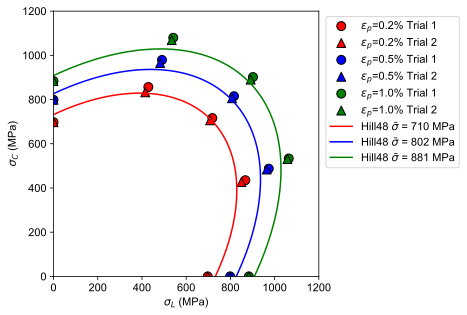

In [283]:
fig = plt.subplot(aspect=1.0)

draw_yield_contour(yield_fun_Hill_2D,  rx, ry, rz, rxy, m=2, sr=swift(0.002, K, ep0, n), ifig=fig, c='r')
draw_yield_contour(yield_fun_Hill_2D,  rx, ry, rz, rxy, m=2, sr=swift(0.005, K, ep0, n), ifig=fig, c='b')
draw_yield_contour(yield_fun_Hill_2D,  rx, ry, rz, rxy, m=2, sr=swift(0.010, K, ep0, n), ifig=fig, c='g')

plt.scatter(ype['sigma 0.2x1'], ype['sigma 0.2y1'], s=80, c='r', marker='o', ec='black', label=r'$\epsilon_p$=0.2% Trial 1')
plt.scatter(ype['sigma 0.2x2'], ype['sigma 0.2y2'], s=80, c='r', marker='^', ec='black', label=r'$\epsilon_p$=0.2% Trial 2')

plt.scatter(ype['sigma 0.5x1'], ype['sigma 0.5y1'], s=80, c='b', marker='o', ec='black', label=r'$\epsilon_p$=0.5% Trial 1')
plt.scatter(ype['sigma 0.5x2'], ype['sigma 0.5y2'], s=80, c='b', marker='^', ec='black', label=r'$\epsilon_p$=0.5% Trial 2')

plt.scatter(ype['sigma 1.0x1'], ype['sigma 1.0y1'], s=80, c='g', marker='o', ec='black', label=r'$\epsilon_p$=1.0% Trial 1')
plt.scatter(ype['sigma 1.0x2'], ype['sigma 1.0y2'], s=80, c='g', marker='^', ec='black', label=r'$\epsilon_p$=1.0% Trial 2')

plt.xlim(0, 1200)
plt.ylim(0, 1200)

# dummy plots
plt.plot([0], [0], 'r-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %swift(0.002, K, ep0, n))
plt.plot([0], [0], 'b-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %swift(0.005, K, ep0, n))
plt.plot([0], [0], 'g-', label=r'Hill48 $\bar \sigma$ = '+'%d MPa' %swift(0.010, K, ep0, n))

plt.xlabel(r'$\sigma_L$ (MPa)')
plt.ylabel(r'$\sigma_C$ (MPa)')
plt.legend(bbox_to_anchor=(1.55, 1))

plt.savefig('Hill48_Swift_LSfit_raw.svg')

### M&A

In [260]:
x0 = [1.0, 1.0, 1.0]

res_Hill = minimize(ls_objective_MA_multiEps, x0)

rx = 1.0; ry = res.x[0]; rz = res.x[1]; rxy = res.x[2]
print('ry=%5.4f, rz=%5.4f, rxy=%5.4f' %(ry, rz, rxy))

ry=1.0286, rz=1.0000, rxy=1.0000


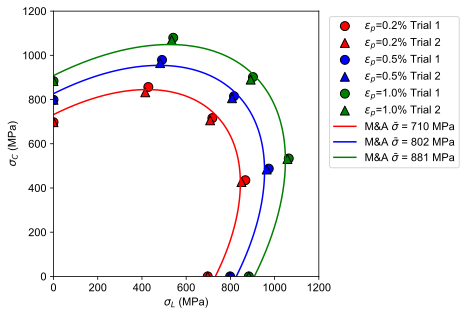

In [284]:
fig = plt.subplot(aspect=1.0)

draw_yield_contour(yield_fun_MA_2D, rx, ry, rz, rxy, m=2, sr=swift(0.002, K, ep0, n), ifig=fig, c='r')
draw_yield_contour(yield_fun_MA_2D, rx, ry, rz, rxy, m=2, sr=swift(0.005, K, ep0, n), ifig=fig, c='b')
draw_yield_contour(yield_fun_MA_2D, rx, ry, rz, rxy, m=2, sr=swift(0.010, K, ep0, n), ifig=fig, c='g')

plt.scatter(ype['sigma 0.2x1'], ype['sigma 0.2y1'], s=80, c='r', marker='o', ec='black', label=r'$\epsilon_p$=0.2% Trial 1')
plt.scatter(ype['sigma 0.2x2'], ype['sigma 0.2y2'], s=80, c='r', marker='^', ec='black', label=r'$\epsilon_p$=0.2% Trial 2')

plt.scatter(ype['sigma 0.5x1'], ype['sigma 0.5y1'], s=80, c='b', marker='o', ec='black', label=r'$\epsilon_p$=0.5% Trial 1')
plt.scatter(ype['sigma 0.5x2'], ype['sigma 0.5y2'], s=80, c='b', marker='^', ec='black', label=r'$\epsilon_p$=0.5% Trial 2')

plt.scatter(ype['sigma 1.0x1'], ype['sigma 1.0y1'], s=80, c='g', marker='o', ec='black', label=r'$\epsilon_p$=1.0% Trial 1')
plt.scatter(ype['sigma 1.0x2'], ype['sigma 1.0y2'], s=80, c='g', marker='^', ec='black', label=r'$\epsilon_p$=1.0% Trial 2')

plt.xlim(0, 1200)
plt.ylim(0, 1200)

# dummy plots
plt.plot([0], [0], 'r-', label=r'M&A $ \bar \sigma $ ='+' %d MPa' %swift(0.002, K, ep0, n))
plt.plot([0], [0], 'b-', label=r'M&A $ \bar \sigma $ ='+' %d MPa' %swift(0.005, K, ep0, n))
plt.plot([0], [0], 'g-', label=r'M&A $ \bar \sigma $ ='+' %d MPa' %swift(0.010, K, ep0, n))

plt.xlabel(r'$\sigma_L$ (MPa)')
plt.ylabel(r'$\sigma_C$ (MPa)')
plt.legend(bbox_to_anchor=(1.55, 1))

plt.savefig('MA_Swift_LSfit_raw.svg')